SVRLinear 
Pembagian Dataset 70/30
kernel='linear', C=1.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt


In [ ]:
file_path = '../Data/EURUSD.xlsx'  
try:
    df = pd.read_excel(file_path)
    print(f"File '{file_path}' berhasil dimuat. Jumlah baris awal: {len(df)}")
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
    
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    raise

File '../Data/EURUSD.xlsx' berhasil dimuat. Jumlah baris awal: 1001


In [ ]:
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df['lag_3'] = df['Close'].shift(3)

df.dropna(inplace=True)
print(f"Data setelah feature engineering dan pembersihan. Jumlah baris: {len(df)}")

Data setelah feature engineering dan pembersihan. Jumlah baris: 998


In [ ]:
X = df[['lag_1', 'lag_2', 'lag_3']] 
y = df['Close']                     


In [ ]:
train_size_70 = int(len(X) * 0.7)

X_train_70, X_test_70 = X[:train_size_70], X[train_size_70:]
y_train_70, y_test_70 = y[:train_size_70], y[train_size_70:]
print(f"Pembagian data 70/30: {len(X_train_70)} latih / {len(X_test_70)} uji")

Pembagian data 70/30: 698 latih / 300 uji


In [ ]:
print("\nMemulai pelatihan model SVR Linear...")
parameter_setting = "kernel='linear', C=1.0"
svr_linear_model = SVR(kernel='linear', C=1.0)

start_time = time.time()
svr_linear_model.fit(X_train_70, y_train_70)
svr_training_time = time.time() - start_time
print(f"Pelatihan SVR Linear selesai dalam {svr_training_time:.4f} detik.")


Memulai pelatihan model SVR Linear...
Pelatihan SVR Linear selesai dalam 0.0020 detik.


In [ ]:
y_pred_svr = svr_linear_model.predict(X_test_70)
results = {
    'Algoritma': ['SVR Linear'],
    'Nilai parameter kernel (khusus SVR)': [parameter_setting],
    'MAE': [mean_absolute_error(y_test_70, y_pred_svr)],
    'RMSE': [np.sqrt(mean_squared_error(y_test_70, y_pred_svr))],
    'MAPE': [np.mean(np.abs((y_test_70 - y_pred_svr) / y_test_70)) * 100],
    'R²': [r2_score(y_test_70, y_pred_svr)],
    'Waktu Pelatihan': [svr_training_time]
}
results_df = pd.DataFrame(results).set_index('Algoritma')

print("\n--- Laporan Kinerja Model SVR Linear (70/30) ---")
print(results_df)


--- Laporan Kinerja Model SVR Linear (70/30) ---
           Nilai parameter kernel (khusus SVR)       MAE      RMSE      MAPE  \
Algoritma                                                                      
SVR Linear              kernel='linear', C=2.0  0.054889  0.068454  4.876855   

                  R²  Waktu Pelatihan  
Algoritma                              
SVR Linear -1.476934         0.001998  


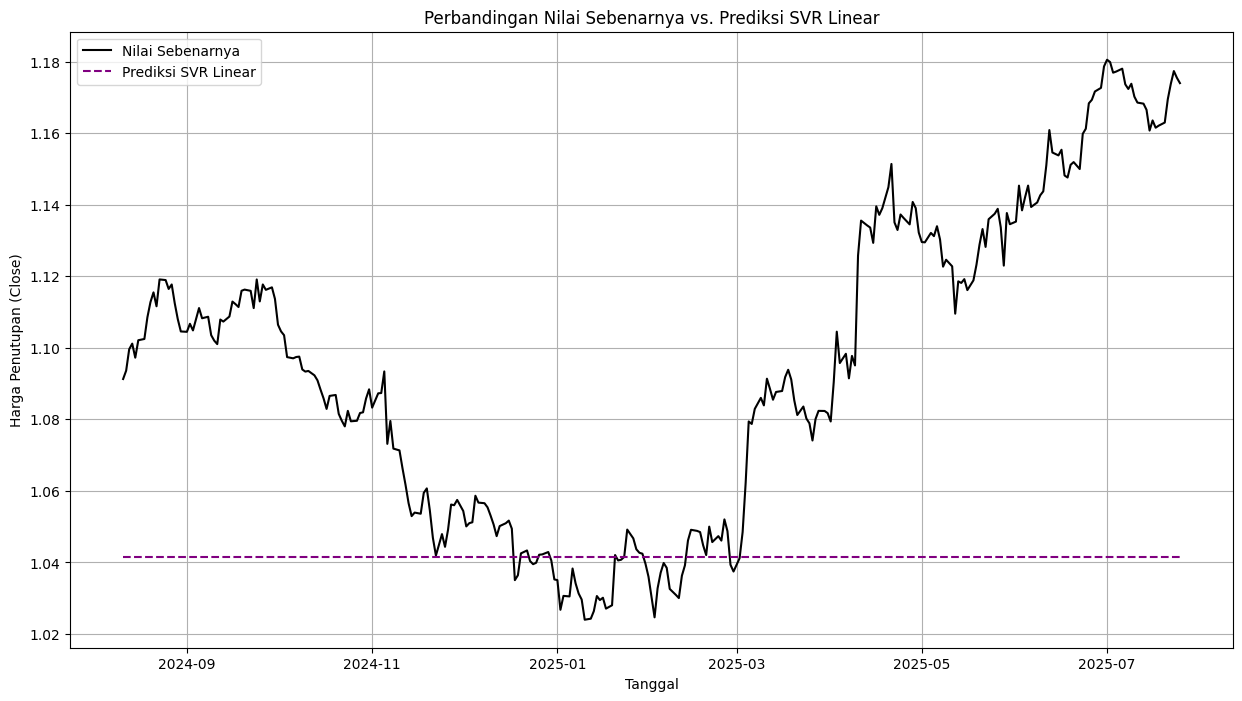

In [ ]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_70, 'Prediksi SVR Linear': y_pred_svr}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi SVR Linear'], label='Prediksi SVR Linear', color='purple', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi SVR Linear')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()

SVRLinear
Pembagian Dataset 80/20
kernel='linear', C=1.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt


In [ ]:
file_path = '../Data/EURUSD.xlsx' 

try:
    df = pd.read_excel(file_path)
    print(f"File '{file_path}' berhasil dimuat. Jumlah baris awal: {len(df)}")
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    raise


File '../Data/EURUSD.xlsx' berhasil dimuat. Jumlah baris awal: 1001


In [ ]:
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df['lag_3'] = df['Close'].shift(3)
df.dropna(inplace=True)
print(f"Data setelah feature engineering dan pembersihan. Jumlah baris: {len(df)}")


Data setelah feature engineering dan pembersihan. Jumlah baris: 998


In [ ]:
X = df[['lag_1', 'lag_2', 'lag_3']]
y = df['Close']


In [ ]:
train_size_80 = int(len(X) * 0.8)

X_train_80, X_test_80 = X[:train_size_80], X[train_size_80:]
y_train_80, y_test_80 = y[:train_size_80], y[train_size_80:]
print(f"Pembagian data 80/20: {len(X_train_80)} latih / {len(X_test_80)} uji")

Pembagian data 80/20: 798 latih / 200 uji


In [ ]:
print("\nMemulai pelatihan model SVR Linear...")
parameter_setting = "kernel='linear', C=1.0"
svr_linear_model = SVR(kernel='linear', C=1.0)
start_time = time.time()
svr_linear_model.fit(X_train_80, y_train_80)
svr_training_time = time.time() - start_time
print(f"Pelatihan SVR Linear selesai dalam {svr_training_time:.4f} detik.")



Memulai pelatihan model SVR Linear...
Pelatihan SVR Linear selesai dalam 0.0010 detik.


In [ ]:
y_pred_svr = svr_linear_model.predict(X_test_80)
results = {
    'Algoritma': ['SVR Linear'],
    'Nilai parameter kernel (khusus SVR)': [parameter_setting],
    'MAE': [mean_absolute_error(y_test_80, y_pred_svr)],
    'RMSE': [np.sqrt(mean_squared_error(y_test_80, y_pred_svr))],
    'MAPE': [np.mean(np.abs((y_test_80 - y_pred_svr) / y_test_80)) * 100],
    'R²': [r2_score(y_test_80, y_pred_svr)],
    'Waktu Pelatihan': [svr_training_time]
}
results_df = pd.DataFrame(results).set_index('Algoritma')
print("\n--- Laporan Kinerja Model SVR Linear (80/20) ---")
print(results_df)



--- Laporan Kinerja Model SVR Linear (80/20) ---
           Nilai parameter kernel (khusus SVR)       MAE      RMSE      MAPE  \
Algoritma                                                                      
SVR Linear              kernel='linear', C=2.0  0.058158  0.074907  5.117589   

                  R²  Waktu Pelatihan  
Algoritma                              
SVR Linear -1.180208         0.000998  


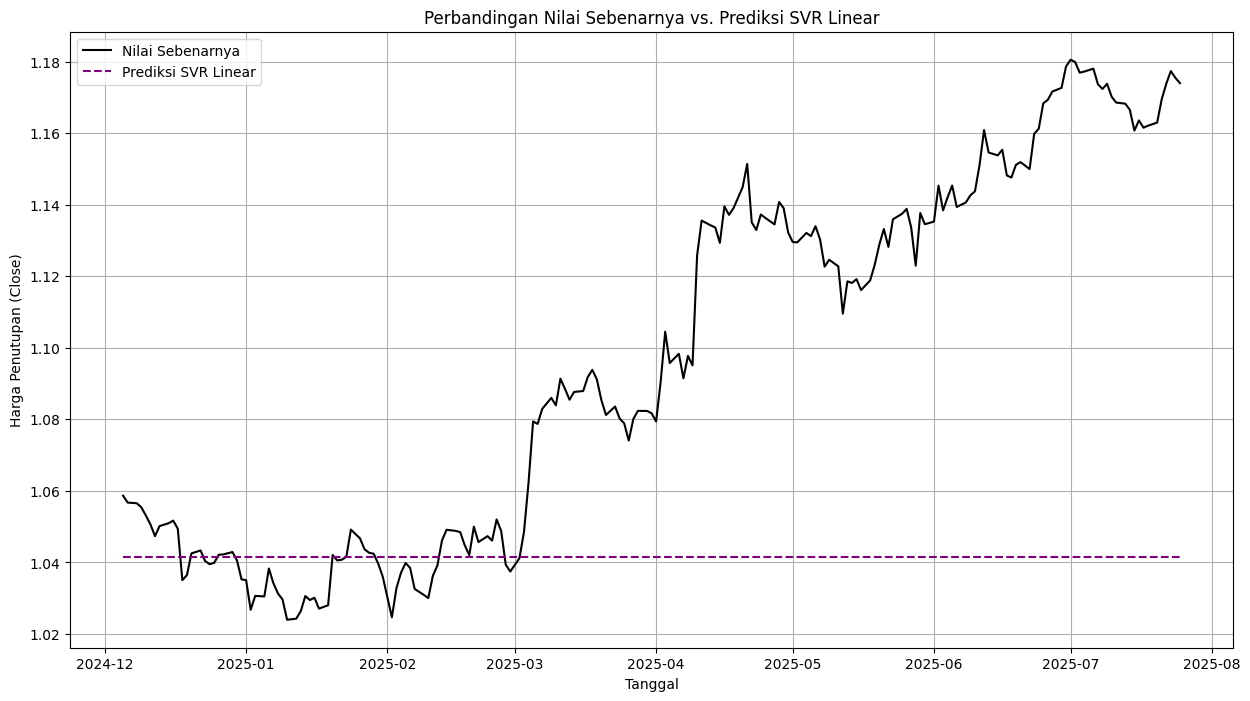

In [ ]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_80, 'Prediksi SVR Linear': y_pred_svr}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi SVR Linear'], label='Prediksi SVR Linear', color='purple', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi SVR Linear')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()